In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sncosmo
from bayesn import SEDmodel
import matplotlib.patches as mpatches
import os
import pandas as pd
import pickle
from scipy import stats

In [2]:
directory = os.fsencode("/root/partiiiproject/Archive")
supernovae_names = ["sn2006hb"]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".dat"):
        supernovae_names.append(filename[:-4])
        continue
    else:
        continue

plt.rcParams.update({'font.size': 20})

In [3]:
dust_laws = ('F99', 'F19', 'G23')

In [4]:
dfW22 = pd.read_csv("ChiSquaredFinalfit.csv")
dfW22 = dfW22.drop(['Unnamed: 0'], axis=1)
dfW22.index = supernovae_names
dfF99 = pd.read_csv("ChiSquaredFinalNormalW22_F99_modelfit.csv")
dfF99 = dfF99.drop(['Unnamed: 0'], axis=1)
dfF99.index = supernovae_names
dfG23 = pd.read_csv("ChiSquaredFinalNormalW22_G23_modelfit.csv")
dfG23 = dfG23.drop(['Unnamed: 0'], axis=1)
dfG23.index = supernovae_names
dfF19 = pd.read_csv("ChiSquaredFinalNormalW22_F19_modelfit.csv")
dfF19 = dfF19.drop(['Unnamed: 0'], axis=1)
dfF19.index = supernovae_names

          W22_x      W22_y W22_x_std  F99_x      F99_y  F19_x      F19_y  \
sn2008fl  0.163  10.766917     0.041  0.163   9.356928  0.163   9.860948   
sn2007jg    0.3   5.821774     0.057    0.3   6.464043    0.3   6.254511   
sn2008R   0.387   9.101481     0.055  0.387  10.017588  0.387  10.089143   
sn2009ad  0.192   5.540137     0.048  0.192   5.612599  0.192   5.954353   
sn2006ob  0.368   4.546819     0.075  0.368   5.254209  0.368   5.210097   
...         ...        ...       ...    ...        ...    ...        ...   
sn2007hj  0.589   9.387449     0.041  0.589   9.104119  0.589   9.370119   
sn2005ki  0.021   5.945165     0.016  0.021   6.713878  0.021   6.617053   
sn2007bc  0.213   4.024323     0.046  0.213   4.252014  0.213   4.091763   
sn2005iq   0.07   5.339884     0.038   0.07   5.552467   0.07   5.852225   
sn2008bq  0.261  11.192571     0.059  0.261  11.826934  0.261  11.513083   

          G23_x      G23_y  
sn2008fl  0.163   9.777484  
sn2007jg    0.3   6.694349  


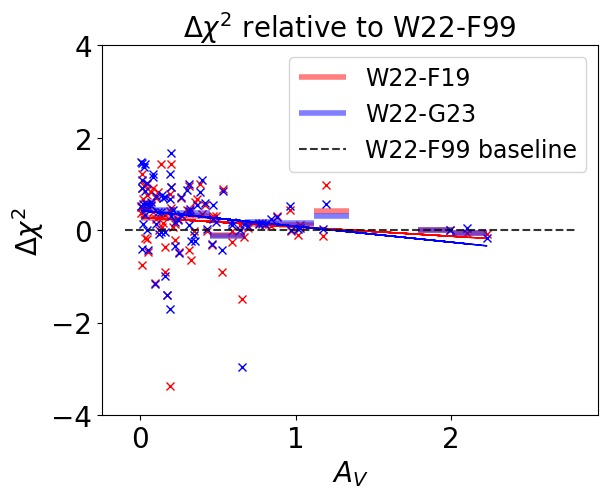

In [5]:
column_names = ("W22_x", "W22_y", "W22_x_std", "W22_y_std","F99_x", "F99_y", "F99_x_std", "F99_y_std", "F19_x", "F19_y", "F19_x_std", "F19_y_std", "G23_x", "G23_y", "G23_x_std", "G23_y_std",)

df = pd.DataFrame(columns=column_names)
df = pd.DataFrame(df, index=supernovae_names)

df["W22_y"]=dfW22["F99"]
df["F99_y"]=dfF99["F99"]
df["F19_y"]=dfF19["F19"]
df["G23_y"]=dfG23["G23"]

#Plot the actual graph
cs = ["r", "b", "g", "k"]


for supernova_name in supernovae_names:

    if supernova_name in ["sn2002cv", "sn2014J", "sn2006X"]:
        continue
        
    
    model_name= ""
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        df.at[supernova_name, "W22"+"_x"] = samplesSummary.loc['AV[0]', 'mean']
        df.at[supernova_name, "W22"+"_x_std"] = samplesSummary.loc['AV[0]', 'sd']
    except FileNotFoundError:
        continue
df["F99_x"] = df["W22_x"]
df["F19_x"] = df["W22_x"]
df["G23_x"] = df["W22_x"]

df = df.dropna(axis=1, how = "all")
df =df.dropna(axis =0, how = "any")

print(df)
labels_display = ["W22-F19","W22-G23"]
for i, identity in enumerate(["F19", "G23"]):
    #plt.errorbar(df[dust_law+"_x"], df[dust_law+"_y"]-df["F99_y"], df[dust_law+"_y_std"].astype(float), fmt =cs[i]+'x', label=dust_law, alpha =0.3)
    plt.plot(df[identity+"_x"], df[identity+"_y"]-df["W22_y"], cs[i]+'x')
    b, a = np.polyfit(df[identity+"_x"].astype(float), df[identity+"_y"].astype(float)-df["W22_y"].astype(float), deg=1)
    plt.plot(df[identity+"_x"].astype(float), a + b * df[identity+"_x"].astype(float), color=cs[i], lw=1)

    #Binned averages
    bin_means, bin_edges, binnumber = stats.binned_statistic(df[identity+"_x"].astype(float), df[identity+"_y"].astype(float)-df["W22_y"].astype(float), 'mean', bins=10)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors=cs[i], lw=4, label=labels_display[i], alpha=0.5)


#Properties of the plot and display
plt.plot([-0.1,2.8], [0,0], linestyle = "--", color = 'k', alpha = 0.8, label = "W22-F99 baseline")
plt.xlabel(f'$A_V$',fontsize = 20)
plt.ylabel(f'$\Delta$$\chi^2$',fontsize = 20)
#plt.xlim([0,2.7])
plt.ylim([-4,4])
plt.legend(fontsize = 17, loc = 'upper right')
plt.title(f'$\Delta$$\chi^2$ relative to W22-F99',fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/chisquaredDifferentModels.pdf", bbox_inches='tight') 
plt.show()

          W22_x      W22_y W22_x_std  F99_x      F99_y  F19_x      F19_y  \
sn2008fl  0.163  10.766917     0.041  0.163   9.356928  0.163   9.860948   
sn2007jg    0.3   5.821774     0.057    0.3   6.464043    0.3   6.254511   
sn2008R   0.387   9.101481     0.055  0.387  10.017588  0.387  10.089143   
sn2009ad  0.192   5.540137     0.048  0.192   5.612599  0.192   5.954353   
sn2006ob  0.368   4.546819     0.075  0.368   5.254209  0.368   5.210097   
...         ...        ...       ...    ...        ...    ...        ...   
sn2007hj  0.589   9.387449     0.041  0.589   9.104119  0.589   9.370119   
sn2005ki  0.021   5.945165     0.016  0.021   6.713878  0.021   6.617053   
sn2007bc  0.213   4.024323     0.046  0.213   4.252014  0.213   4.091763   
sn2005iq   0.07   5.339884     0.038   0.07   5.552467   0.07   5.852225   
sn2008bq  0.261  11.192571     0.059  0.261  11.826934  0.261  11.513083   

          G23_x      G23_y  
sn2008fl  0.163   9.777484  
sn2007jg    0.3   6.694349  


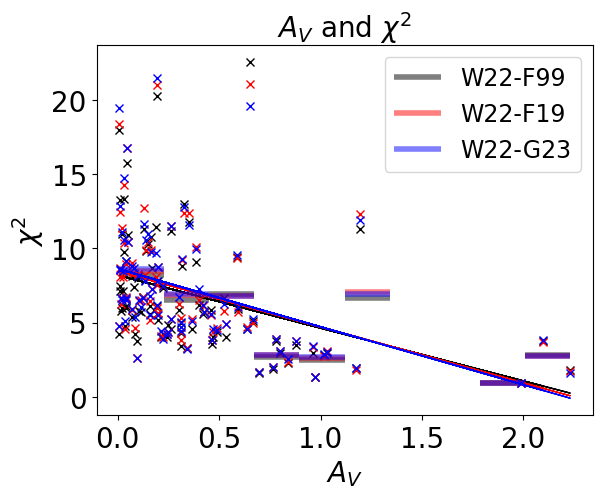

In [7]:
column_names = ("W22_x", "W22_y", "W22_x_std", "W22_y_std","F99_x", "F99_y", "F99_x_std", "F99_y_std", "F19_x", "F19_y", "F19_x_std", "F19_y_std", "G23_x", "G23_y", "G23_x_std", "G23_y_std",)

df = pd.DataFrame(columns=column_names)
df = pd.DataFrame(df, index=supernovae_names)

df["W22_y"]=dfW22["F99"]
df["F99_y"]=dfF99["F99"]
df["F19_y"]=dfF19["F19"]
df["G23_y"]=dfG23["G23"]

#Plot the actual graph
cs = ["k", "r", "b", "g"]


for supernova_name in supernovae_names:

    if supernova_name in ["sn2002cv", "sn2014J", "sn2006X"]:
        continue
        
    
    model_name= ""
    dust_law = "F99"
    sampleSummaryDir = "DustLawsFitOfAllSamples"+model_name+"/"+supernova_name + dust_law + "_fit_summary.csv"
    try:
        samplesSummary = pd.read_csv(sampleSummaryDir)
        samplesSummary = samplesSummary.rename(index=samplesSummary['Unnamed: 0'])
        df.at[supernova_name, "W22"+"_x"] = samplesSummary.loc['AV[0]', 'mean']
        df.at[supernova_name, "W22"+"_x_std"] = samplesSummary.loc['AV[0]', 'sd']
    except FileNotFoundError:
        continue


df["F99_x"] = df["W22_x"]
df["F19_x"] = df["W22_x"]
df["G23_x"] = df["W22_x"]

df = df.dropna(axis=1, how = "all")
df =df.dropna(axis =0, how = "any")

print(df)

labels_display = ["W22-F99","W22-F19","W22-G23"]

for i, identity in enumerate(["W22", "F19", "G23"]):
    #plt.errorbar(df[dust_law+"_x"], df[dust_law+"_y"]-df["F99_y"], df[dust_law+"_y_std"].astype(float), fmt =cs[i]+'x', label=dust_law, alpha =0.3)
    plt.plot(df[identity+"_x"], df[identity+"_y"], cs[i]+'x')
    b, a = np.polyfit(df[identity+"_x"].astype(float), df[identity+"_y"].astype(float), deg=1)
    plt.plot(df[identity+"_x"].astype(float), a + b * df[identity+"_x"].astype(float), color=cs[i], lw=1)

    #Binned averages
    bin_means, bin_edges, binnumber = stats.binned_statistic(df[identity+"_x"].astype(float), df[identity+"_y"].astype(float), 'mean', bins=10)
    plt.hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors=cs[i], lw=4, label=labels_display[i], alpha=0.5)

    


#Properties of the plot and display
plt.xlabel(f'$A_V$',fontsize = 20)
plt.ylabel(f'$\chi^2$',fontsize = 20)
#plt.xlim([0,2.7])
#plt.ylim([-5,7])
plt.legend(fontsize = 17, loc = 'upper right')
plt.title(f'$A_V$ and $\chi^2$',fontsize = 20)
plt.savefig("/root/partiiiproject/DustLawsGeneralGraphs/chisquaredDifferentModelsAbsolute.pdf", bbox_inches='tight') 
plt.show()